<a href="https://colab.research.google.com/github/minhle2505/EDA_Netflix/blob/main/NETFLIX_EDA_RECOMMENDATIONS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Netflix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Reading info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Cleaning data

In [ ]:
#Check null data
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

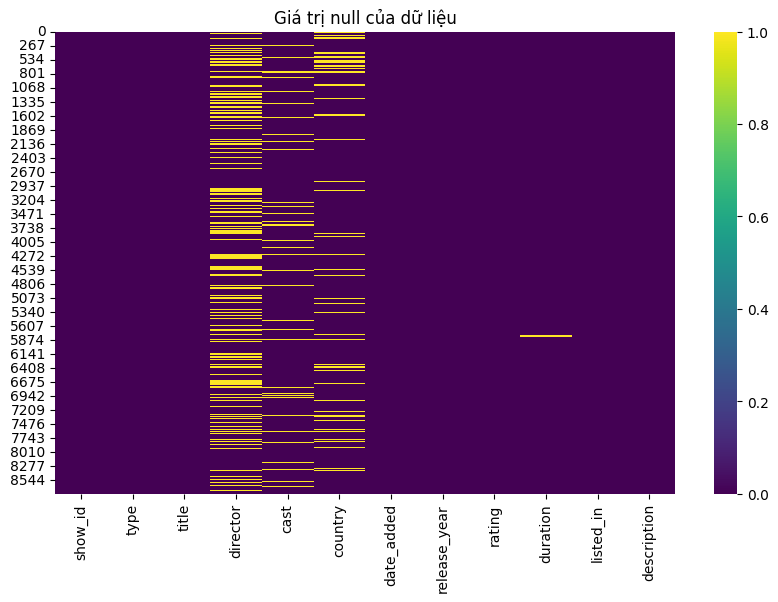

In [ ]:
# Visualization các giá trị null trong dataframe
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis")
plt.title("Giá trị null của dữ liệu")
plt.show()

In [ ]:

# Drop rows with NaN values in specified columns
netflix_dropped = df.dropna(subset=['rating', 'duration', 'date_added'])

# Print rows with non-NaN values in specified columns
selected_columns = ['show_id','title','type','director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']
selected_rows = netflix_dropped.loc[:, selected_columns]
print(selected_rows)

     show_id                  title     type         director  \
0         s1   Dick Johnson Is Dead    Movie  Kirsten Johnson   
1         s2          Blood & Water  TV Show              NaN   
2         s3              Ganglands  TV Show  Julien Leclercq   
3         s4  Jailbirds New Orleans  TV Show              NaN   
4         s5           Kota Factory  TV Show              NaN   
...      ...                    ...      ...              ...   
8802   s8803                 Zodiac    Movie    David Fincher   
8803   s8804            Zombie Dumb  TV Show              NaN   
8804   s8805             Zombieland    Movie  Ruben Fleischer   
8805   s8806                   Zoom    Movie     Peter Hewitt   
8806   s8807                 Zubaan    Movie      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Xóa các giá trị NA trong các cột 'rating','duration','date_added' trực tiếp trong dataframe
df.dropna(subset=['rating','duration','date_added'], inplace = True)

In [ ]:
# Check lại
df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:

#Replace na values in cast,country, director
df['cast'].fillna('No Cast', inplace  = True)
df['director'].fillna('No Director', inplace = True)
df['country'].fillna('No Country data', inplace = True)

In [ ]:
#
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Exploratory Data Analysis

## Movies and TV Shows

In [ ]:
import plotly.express as px

1. Type

In [ ]:
import plotly.graph_objects as go
type_counts = df['type'].value_counts()
# Tạo biểu đồ tròn (pie chart) sử dụng Plotly
pie_chart = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts.values,
                                   textinfo='label+percent',
                                   marker_colors=['red', 'blue'])])

pie_chart.update_layout(title='Tỷ lệ phim/TV show theo thể loại')

# Hiển thị biểu đồ tròn
pie_chart.show()

2. Year_added

Nếu một nhà sản xuất muốn phát hành một số nội dung, thì ông ấy nên làm điều đó vào tháng nào? (Tháng mà ít nhất số lượng nội dung được thêm vào)

In [ ]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

In [ ]:
month_year_df = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

# Tạo biểu đồ heatmap sử dụng Plotly
heatmap = go.Figure(data=go.Heatmap(z=month_year_df.values,
                                     x=month_year_df.columns,
                                     y=month_year_df.index,
                                     colorscale="inferno"))

heatmap.update_layout(title="Content Heatmap",
                      xaxis_title="Year",
                      yaxis_title="Month")

# Hiển thị biểu đồ heatmap
heatmap.show()


*Dựa vào biểu đồ heatmap ở trên, trong năm 2020 thì nhà sản xuất nên lựa chọn phát hành nội dung vào tháng 2 vì tháng 2 là tháng có ít nội dung được thêm vào nhất *

3. Rating

Giải thích về các ký hiệu trong cột Rating: Dưới đây là giải thích các ký hiệu viết tắt trong cột "rating" của dữ liệu Netflix:

PG-13: Phim dành cho khán giả từ 13 tuổi trở lên. Có thể chứa một số tình tiết không phù hợp cho trẻ em nhỏ.

TV-MA: Phim dành cho khán giả trưởng thành. Chứa nội dung có thể không phù hợp cho trẻ em dưới 17 tuổi.

PG: Phim cần sự hướng dẫn của phụ huynh cho trẻ em. Có thể chứa một số tình tiết không phù hợp cho trẻ em nhỏ.

TV-14: Phim dành cho khán giả từ 14 tuổi trở lên. Có thể chứa nội dung cần sự hướng dẫn của người lớn.

TV-PG: Phim dành cho trẻ em và thanh thiếu niên. Có thể chứa một số tình tiết không phù hợp cho trẻ em nhỏ.

TV-Y: Phim dành cho mọi độ tuổi. Không có nội dung đáng sợ hoặc kịch tính.

TV-Y7: Phim dành cho trẻ em từ 7 tuổi trở lên. Có thể chứa một số tình tiết kịch tính nhưng không đáng sợ.

R: Phim cần sự hướng dẫn của người lớn cho khán giả dưới 17 tuổi.

TV-G: Phim dành cho mọi độ tuổi. Thích hợp cho gia đình và trẻ em.

G: Phim dành cho mọi độ tuổi. Thích hợp cho gia đình và trẻ em.

NC-17: Phim chỉ dành cho khán giả từ 17 tuổi trở lên.

NR: Không có xác định độ tuổi. Thường xuất hiện ở các trường hợp phim độc lập hoặc không có xếp loại cụ thể.

TV-Y7-FV: Phim dành cho trẻ em từ 7 tuổi trở lên và có thể chứa tình tiết hài hước.

UR: Chưa xác định độ tuổi. Thường xuất hiện khi phim chưa được xếp loại hoặc không có thông tin về độ tuổi.

In [ ]:
#Đếm số lượng của mỗi loại rating
rating_counts = df['rating'].value_counts()

#Tạo 1 Dataframe chứa thông tin để vẽ biểu đồ
df_rating_counts = pd.DataFrame({'Rating': rating_counts.index, 'Count': rating_counts.values})

#
fig = px.bar(df_rating_counts, x='Rating', y='Count', color='Rating',
             title='Count of Rating on Netflix', labels={'Rating': 'Rating', 'Count': 'Count'})
# Add count labels on top of bars
for idx, count in enumerate(df_rating_counts['Count']):
     fig.add_annotation(text=str(count), x=df_rating_counts['Rating'][idx], y=count,
                        showarrow=False, font=dict(size=11, color='black'))

# Show the plot
fig.show()


Dựa vào biểu đồ trên, ta thấy rằng các moive và TV show trên Netflix có rating phổ biến là TV_MA và TV-14.Điều này có thể cho thấy rằng nền tảng Netflix tập trung vào nội dung được đánh giá cho các đối tượng trưởng thành và khán giả trên 14 tuổi.

4. year_added

Số lượng content được thêm vào mỗi năm (tính đến 2021) của Movies, TV Shows

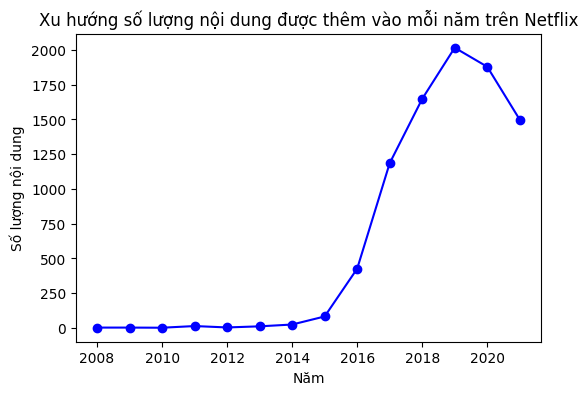

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo bạn đã đọc dữ liệu và thực hiện các bước chuyển đổi dữ liệu như trước

# Tạo DataFrame tổng hợp số lượng nội dung theo từng năm
content_per_year = df.groupby('year_added').size()

# Tạo biểu đồ đường bằng Matplotlib
plt.figure(figsize=(6, 4))
plt.plot(content_per_year.index, content_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Năm')
plt.ylabel('Số lượng nội dung')
plt.title('Xu hướng số lượng nội dung được thêm vào mỗi năm trên Netflix')
plt.grid(False)  # Ẩn ô lưới
plt.show()

In [ ]:
# Chuyển đổi cột date_added thành định dạng ngày tháng
df['date_added'] = pd.to_datetime(df['date_added'])

# Trích xuất năm từ cột date_added
df['year_added'] = df['date_added'].dt.year

# Tạo DataFrame tổng hợp số lượng nội dung theo từng năm và loại (Movie/TV Show)
content_per_year = df.groupby(['year_added', 'type']).size().unstack()

# Tạo biểu đồ đường sử dụng Plotly
fig = px.line(content_per_year, x=content_per_year.index, y=['Movie', 'TV Show'],
              labels={'x': 'Năm', 'y': 'Số lượng nội dung'},
              title='Xu hướng số lượng nội dung được thêm vào mỗi năm trên Netflix (Movies/TV Shows)')

# Hiển thị biểu đồ đường
fig.show()


Chúng ta có thể thấy rằng Netflix đã trải qua một thời kỳ khởi đầu chậm rãi kéo dài qua nhiều năm. Tuy nhiên, từ năm 2015, mọi thứ bắt đầu thay đổi tích cực và từ đó, có một sự gia tăng đáng kể.

Có vẻ như việc bổ sung nội dung đã giảm tốc độ trong năm 2020, có khả năng do ảnh hưởng của đại dịch COVID-19.

## Movies

In [ ]:
netflix_movies_df = df[df['type'] == 'Movie']

In [ ]:
netflix_movies_df['duration']=netflix_movies_df['duration'].str.replace(' min','')
netflix_movies_df['duration']=netflix_movies_df['duration'].astype(int)
# Select only the columns of interest
netflix_movies_col_subset = netflix_movies_df[["title", "country", "listed_in", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head())

                               title  \
0               Dick Johnson Is Dead   
6   My Little Pony: A New Generation   
7                            Sankofa   
9                       The Starling   
12                      Je Suis Karl   

                                              country  \
0                                       United States   
6                                     No Country data   
7   United States, Ghana, Burkina Faso, United Kin...   
9                                       United States   
12                            Germany, Czech Republic   

                                           listed_in  release_year  duration  
0                                      Documentaries          2020        90  
6                           Children & Family Movies          2021        91  
7   Dramas, Independent Movies, International Movies          1993       125  
9                                   Comedies, Dramas          2021       104  
12                   

<ipython-input-21-18db11484211>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-18db11484211>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-22-4045623bc147>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



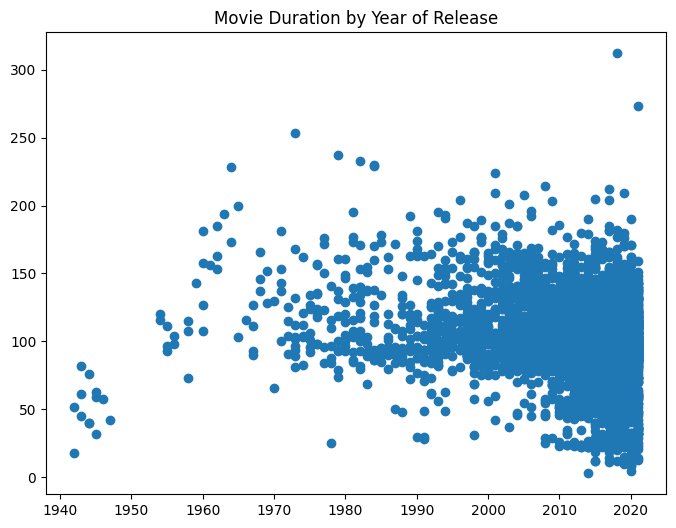

In [ ]:
# Convert the "release_year" column to numeric
netflix_movies_col_subset["release_year"] = pd.to_numeric(netflix_movies_col_subset["release_year"], errors="coerce")

# Create a figure and increase the figure size
fig = plt.figure(figsize=(8, 6))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

1. Digging Deeper

Chúng ta cũng có thể thấy rằng, trong khi các bộ phim mới hơn hiện diện với tần suất lớn trên nền tảng Netflix, nhiều bộ phim ngắn đã được phát hành trong suốt hai thập kỷ qua.

Khi kiểm tra kỹ hơn, có điều gì đó khác biệt đang diễn ra. Một số bộ phim trong số này có thời lượng dưới một tiếng! Hãy lọc DataFrame của chúng ta để tìm những bộ phim có thời lượng dưới 60 phút và xem thể loại của chúng. Điều này có thể giúp chúng ta có cái nhìn về điều gì đang gây ảnh hưởng tới thời lượng phim trung bình của nền tàng.

In [ ]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"] <60 ]
longer_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"] >60 ]

# Print the first 20 rows of short_movies
print(short_movies.head(20))

                                                 title               country  \
45                              My Heroes Were Cowboys       No Country data   
71                         A StoryBots Space Adventure       No Country data   
77                       Little Singham - Black Shadow       No Country data   
279               Monster Hunter: Legends of the Guild  United States, Japan   
470                        Bridgerton - The Afterparty       No Country data   
484                       Lee Su-geun: The Sense Coach       No Country data   
495                                          Awon Boyz       No Country data   
560                                            Audible       No Country data   
694                                              Aziza        Lebanon, Syria   
695                                     Besieged Bread       No Country data   
729                      Bling Empire - The Afterparty       No Country data   
730                         Cobra Kai - 

2. Marking Non-feature Films

Thật thú vị! Trông có vẻ như là có rất nhiều các bộ phim với thời lượng dưới 60 phút rơi vào các thể loại như 'Documentaries', 'Children & Family Movies' hoặc 'Stand-up Comedy'. Dây là một kết quả khá hợp lí, vì thường các nội dung này sẽ có thời lượng ngắn hơn so với các bom tấn Hollywood!

Chúng ta có thể xóa các dòng này khỏi DataFrame và tiếp tục phân tích. Tuy nhiên, ta còn có thể khám phá tác động của các nội dung này đối với toàn thể dữ liệu bằng cách đánh dấu chúng trên biểu đồ trực quan hóa với một màu khác.

In [ ]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    listed_in = row["listed_in"]
    if "Children & Family Movies" in listed_in:
        colors.append("red")
    elif "Documentaries" in listed_in:
        colors.append("blue")
    elif "Stand-Up Comedy" in listed_in:
        colors.append("green")
    else:
        colors.append("black")

# Inspect the first 10 values in your list
print(colors[:10])


['blue', 'red', 'black', 'black', 'black', 'red', 'blue', 'black', 'black', 'red']


3. Plotting a ScatterPlot

Ok, và giờ chúng ta đã có một danh sách các màu của các thể loại trên, giờ ta đã có thể xem xem các thể loại đó mang lại ảnh hưởng như thế nào đối với thời lượng trung bình của các nội dung phim trên Netflix.

Ta sẽ thêm 2 subplot về đường trung bình của các phim theo từng năm, từ đó có thể dễ dàng nhìn thấy tác động của các thể loại vừa nêu trên.

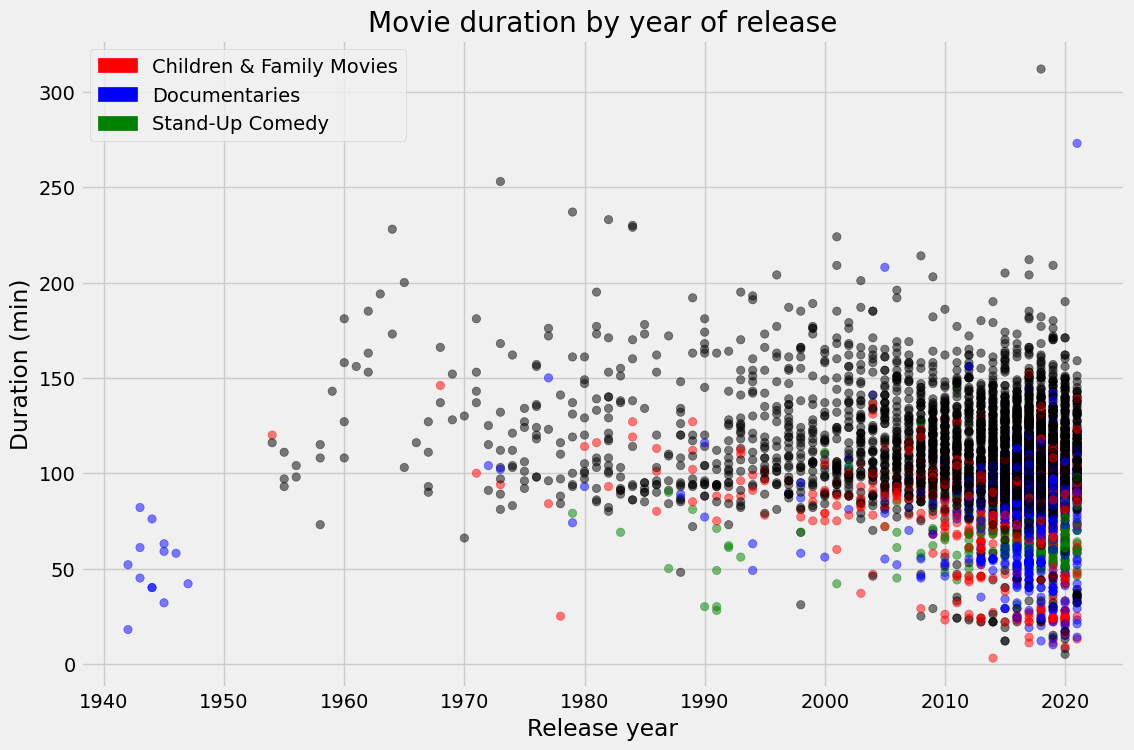

In [ ]:
import matplotlib.patches as mpatches

# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], color = colors, alpha = 0.5)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")


Children = mpatches.Patch(color='red', label='Children & Family Movies')
Documentaries = mpatches.Patch(color='blue', label='Documentaries')
Stand_up = mpatches.Patch(color = 'green', label = 'Stand-Up Comedy')
plt.legend(handles=[Children, Documentaries, Stand_up])

# Show the plot
plt.show()

In [ ]:
# Calculate the average duration for each year
average_duration_by_year = netflix_movies_col_subset.groupby("release_year")["duration"].mean()
average_duration_by_year_long = longer_movies.groupby("release_year")["duration"].mean()

# Calculate the 1st quartile and 3rd quartile for each year
q1_duration_by_year = netflix_movies_col_subset.groupby("release_year")["duration"].quantile(0.25)
q3_duration_by_year = netflix_movies_col_subset.groupby("release_year")["duration"].quantile(0.75)

# Create a Plotly figure
fig = go.Figure()

# Add average duration line plots
fig.add_trace(go.Scatter(x=average_duration_by_year.index, y=average_duration_by_year.values,
                         mode='lines', line=dict(color='grey'), name='Average Duration'))

# Add min-max area as a shaded area between 1st quartile and 3rd quartile
fig.add_trace(go.Scatter(x=q1_duration_by_year.index, y=q1_duration_by_year.values,
                         mode='lines', line=dict(color='grey', width=0.1), showlegend=False, fill='tonexty'))
fig.add_trace(go.Scatter(x=q3_duration_by_year.index, y=q3_duration_by_year.values,
                         mode='lines', line=dict(color='grey', width=0.1), showlegend=False, fill='tonexty'))

# Add average duration without Short Movies line plot
fig.add_trace(go.Scatter(x=average_duration_by_year_long.index, y=average_duration_by_year_long.values,
                         mode='lines', line=dict(color='dodgerblue'), name='Average Duration without Short Movies'))

# Customize layout
fig.update_layout(
    title="Average Movie Duration by Year of Release",
    xaxis_title="Release Year",
    yaxis_title="Duration (min)",
    legend=dict(x=0, y=1),
    template="plotly_white"
)

# Show the plot
fig.show()


Có thể thấy rõ rằng các phim thuộc các thể loại ngắn kia đã phần nào ảnh hưởng đến thời lượng phim trung bình của toàn thể các nội dung trên Netflix. Tuy vậy, sự ảnh hưởng có thể được coi là không quá đáng kể.

Điều đáng chú ý nhất ở đây là sự xuất hiện rõ ràng của các thể loại phim ngắn này trong khoảng thời gian từ những năm 2010 cho đến hiện nay. Cả 2 đường thể hiện thời lượng phim trung bình bao gồm các thể loại này và không bao gồm đều có dấu hiệu giảm nhẹ, điều đó phần nào giúp ta khẳng định rằng thời lượng phim đang có xu hướng ổn định dần và không có quá nhiều thay đổi qua các năm. Có thể các nhà làm phim đã đưa ra được các nghiên cứu và phân tích để tìm ra thời lượng phim phù hợp cho khán giả( không quá ngắn hoặc quá dài) nhằm tăng trải nghiệm khi xem phim của họ.

KẾT LUẬN( ĐỀ XUẤT VỀ THỜI LƯỢNG PHIM PHÙ HỢP)

Ta có thể đưa ra một thời lượng xem phim phù hợp dựa trên data cũng như từ trải nghiệm chủ quan của người phân tích. Phạm vi thời lượng phim đề xuất sẽ là khoảng nằm giữa điểm tứ phân vị thứ nhất( 1st Quantile) và điểm tứ phân vị thứ ba( 3rd Quantile) của toàn bộ dataset.

In [ ]:
# Calculate the 1st quartile and 3rd quartile for the entire dataset
q1_total_duration = netflix_movies_col_subset["duration"].quantile(0.25)
q3_total_duration = netflix_movies_col_subset["duration"].quantile(0.75)

# Create a Plotly figure
fig = go.Figure()

# Add average duration line plots
fig.add_trace(go.Scatter(x=average_duration_by_year.index, y=average_duration_by_year.values,
                         mode='lines', line=dict(color='grey'), name='Average Duration'))

# Add average duration without Short Movies line plot
fig.add_trace(go.Scatter(x=average_duration_by_year_long.index, y=average_duration_by_year_long.values,
                         mode='lines', line=dict(color='dodgerblue'), name='Average Duration without Short Movies'))

# Annotate the recommendation area with text
fig.add_annotation(text="PHẠM VI ĐỀ XUẤT", xref="paper", yref="y",
                   x=0, y=q3_total_duration + 3,
                   showarrow=False, font=dict(color="dodgerblue"))

# Customize y-axis ticks to include the quartile values
yaxis_ticks = [q1_total_duration, q3_total_duration]
fig.update_layout(yaxis=dict(tickvals=yaxis_ticks))

# Customize layout
fig.update_layout(
    title="Average Movie Duration by Year of Release",
    xaxis_title="Release Year",
    yaxis_title="Duration (min)",
    legend=dict(x=0, y=1),
    template="plotly_white"
)

# Add recommendation area for the total quantile range
fig.add_shape(type="rect", xref="paper", yref="y", x0=0, x1=1, y0=q1_total_duration, y1=q3_total_duration,
              fillcolor="dodgerblue", opacity=0.2, layer="below", line=dict(width=0))



# Show the plot
fig.show()

Thời lượng phù hợp với phim trên Netflix có thể thay đổi dựa trên sở thích và thói quen xem phim của từng người. Tuy nhiên, những phân tích trên đã phần nào đưa ra được thời lượng đề xuất khá phù hợp dựa trên các tiêu chí như sau:

* **Thời gian cá nhân có sẵn:** Nếu bạn có thời gian hạn chế, bạn có thể ưa thích những bộ phim có thời lượng ngắn (khoảng 90-120 phút). Những bộ phim này có thể dễ dàng xem trong khoảng thời gian gián đoạn hoặc vào buổi tối.
* **Khả năng tập trung:** Nếu bạn có khả năng tập trung ngắn hơn, những bộ phim có thời lượng 90-120 phút có thể phù hợp hơn cho việc xem.

Những phân tích chỉ thuần là nhìn vào những thống kê từ dữ liệu ta có được nhưng lại đáp ứng đủ một số tiêu chí được đưa ra về thời lượng phim phù hợp đã khẳng định rằng chúng ta đã phân tích đúng hướng, điều này cũng chứng tỏ rằng dữ liệu vẫn còn rất nhiều những thông tin mà ta có thể tìm kiếm và đưa ra được nhiều insight mới mẻ hơn.

4. GENRES in Movies

In [ ]:
from collections import Counter

genres=list(netflix_movies_df['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= False)}

The Circlify Algorithm

In [ ]:
!pip install circlify

In [ ]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    g.values(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

Thuật toán này sẽ tạo nên kích cỡ của các đường tròn dựa trên số lượng những phim trong thể loại đó.

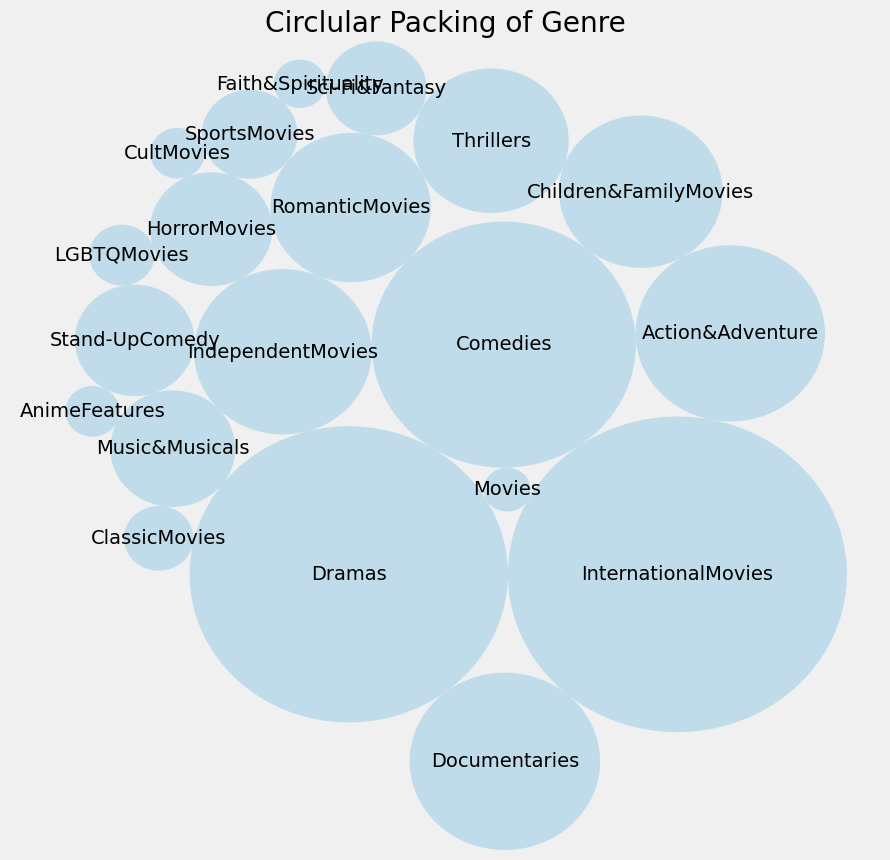

In [ ]:
# import libraries

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Circlular Packing of Genre')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = g.keys()

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
        label,
        (x,y ) ,
        va='center',
        ha='center'
    )

<ipython-input-32-a95bfe0a816a>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



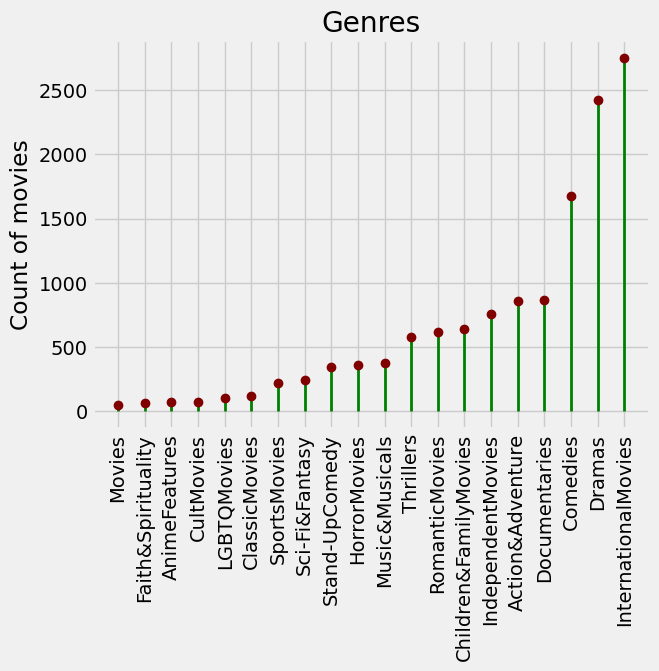

<Figure size 1000x1000 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green', linewidth = 2)
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

Ta có thể thấy rõ rằng International Movies, Dramas và Comedies là những thể loại được ưa chuộng nhất trên nền tảng Netflix.

Điều này thực sự là một cái nhìn thú vị vào sự đa dạng của thị trường phim trực tuyến hiện nay. Thể loại phim quốc tế (International Movies) không chỉ mang đến cho khán giả một cửa sổ vào văn hóa và cuộc sống ở khắp nơi trên thế giới, mà còn thể hiện tầm quan trọng của việc kết nối và thấu hiểu giữa các quốc gia. Những bộ phim thuộc thể loại này thường mang đậm màu sắc văn hóa đặc trưng và tạo ra sự tò mò trong việc khám phá những điều mới lạ.

Trong khi đó, thể loại Drama không ngừng thể hiện sức hấp dẫn của mình với khả năng tái hiện những câu chuyện động trái tim và tình cảm con người. Những bộ phim Drama tập trung vào việc phác họa các mẩu chuyện cuộc sống, từ những niềm vui, nỗi buồn, cho đến những quyết định khó khăn mà mỗi con người phải đối mặt. Điều này tạo nên sự thấm thía và gần gũi, khiến cho người xem cảm nhận rằng họ không đơn độc trong cuộc hành trình của mình.

Không kém phần quan trọng, thể loại Comedies mang đến những tiếng cười sảng khoái và nhẹ nhàng. Từ những pha hài hước thú vị đến những tình huống dở khóc dở cười, các bộ phim hài có khả năng thư giãn tinh thần và đem lại niềm vui sảng khoái cho khán giả. Bên cạnh việc tạo nên không gian giải trí, thể loại này thường còn truyền tải thông điệp tích cực về tình bạn, tình yêu, và sự lạc quan trong cuộc sống.

Tổng cộng, sự ưa chuộng của International Movies, Dramas và Comedies trên nền tảng Netflix thực sự phản ánh nhu cầu đa dạng của khán giả, từ mong muốn khám phá thế giới, tìm hiểu sâu xa tâm hồn con người, cho đến việc thả lỏng và cười đùa trong cuộc sống hàng ngày.

## CONTENT IN VIETNAM

In [ ]:
!pip install squarify


In [ ]:
netflix_vie=df[df['country']=='Vietnam']
nannef=netflix_vie.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                 color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()


Có một số lí do tại sao có ít phim Việt Nam trên nền tảng Netflix:

1. **Quyền Sở Hữu và Quyền Trình Diễn:** Một trong những nguyên nhân chính là vấn đề liên quan đến quyền sở hữu và quyền trình diễn. Các bộ phim cần phải có thỏa thuận giữa các bên, bao gồm nhà sản xuất, đạo diễn và nền tảng phát sóng, để có thể xuất hiện trên Netflix.

2. **Chất Lượng và Tiêu Chuẩn:** Netflix có tiêu chuẩn chất lượng nghiêm ngặt đối với nội dung mình phát sóng. Để xuất hiện trên nền tảng này, các bộ phim cần phải đáp ứng các tiêu chí về nội dung, diễn xuất, kỹ thuật, và thậm chí cả khía cạnh trình diễn toàn cầu.

3. **Thị Trường Quốc Tế:** Mặc dù việc xuất hiện trên nền tảng toàn cầu như Netflix có thể giúp phim Việt Nam tiếp cận một lượng lớn khán giả quốc tế, nhưng sự đa dạng văn hóa và ngôn ngữ trong phim cũng có thể tạo ra một số thách thức về sự hiểu biết và tương tác.

4. **Kinh Phí:** Sản xuất và đưa phim lên một nền tảng lớn như Netflix đòi hỏi một lượng tài nguyên tài chính, từ việc chất lượng sản xuất đến việc quảng bá và tiếp thị. Các bộ phim cần đủ kinh phí để đáp ứng các tiêu chuẩn của nền tảng này.

5. **Công Việc Đàm Phán và Thỏa Thuận:** Công việc đàm phán, thỏa thuận hợp đồng, và việc sắp xếp các điều khoản là một quá trình phức tạp và mất thời gian. Điều này có thể làm tăng thời gian cần thiết để các bộ phim Việt Nam xuất hiện trên nền tảng Netflix.

Dù có ít phim Việt Nam trên Netflix hiện tại, điều này không loại trừ khả năng tăng cường hợp tác trong tương lai. Để tăng khả năng có nhiều phim Việt Nam hơn trên nền tảng này, sự hợp tác và nỗ lực chung của các bên liên quan là điều quan trọng.

# TV Shows

In [ ]:
netflix_shows_df = df[df['type'] == 'TV Show']

In [ ]:
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No Country data,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


1. Country

In [ ]:
# Chia các quốc gia thành từng dòng riêng biệt
filter_country = netflix_shows_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
count_title_by_country = filter_country.value_counts()

# Tạo DataFrame với số lượng title theo quốc gia
data = count_title_by_country.reset_index()
data.columns = ['country_name', 'title_count']

# Sử dụng Plotly Express để tạo biểu đồ map
fig = px.choropleth(data, locations='country_name', locationmode='country names', color='title_count',
                    title='Số lượng title về TV Show trên Netflix theo quốc gia',
                    color_continuous_scale='sunset',
                    labels={'title_count': 'Số lượng title'},
                    hover_name='country_name')

# Hiển thị biểu đồ
fig.show()

Dựa vào biểu đồ về số lượng TV Shows trên Netflix của các quốc gia, có thể thấy rằng các quốc gia có số lượng TV Shows nhiều nhất bao gồm Mỹ, Anh (UK), Nhật Bản, Canada, và Hàn Quốc. Đây đều là các thị trường lớn với số lượng người xem đáng kể. Do đó, Netflix cần cung cấp nhiều nội dung hơn để đáp ứng nhu cầu của đối tượng mục tiêu đông đảo. Các thị trường này cũng có nhiều sự cạnh tranh từ các dịch vụ streaming khác và hãng sản xuất nội dung. Để duy trì sự hấp dẫn và cạnh tranh, Netflix cần phải có một lượng lớn nội dung mới và đa dạng.

2. Release_year

In [ ]:
# Tính số lượng TV Show theo từng năm phát hành
shows_per_year = netflix_shows_df['year_added'].value_counts().reset_index()
shows_per_year.columns = ['Year', 'Number_of_Shows']


In [ ]:
fig = px.bar(shows_per_year, x='Year', y='Number_of_Shows', title='Số lượng TV Show theo từng năm')

# Đặt tên cho các trục
fig.update_xaxes(title_text='Năm được thêm vào')
fig.update_yaxes(title_text='Số lượng TV Show')

# Hiển thị biểu đồ
fig.show()

Ta thấy rằng từ 1930-1990 thì số lượng TV Show được phát hành rất là ít.Có thể thấy do công nghệ và quy trình sản xuất nội dung truyền hình lúc này vẫn đang trong giai đoạn phát triển. Sự phổ biến của truyền hình cáp và truyền hình vệ tinh vẫn chưa đạt đến mức cao như hiện nay và người dùng ưa thích các hình thức giải trí khác như phát thanh, điện ảnh, hoặc các hoạt động ngoại trời hơn.

Từ 1990-2010 thì bắt đầu có sự tăng trưởng khá rõ do công nghệ truyền hình và sản xuất nội dung trở nên tiến bộ và tiện ích hơn. Sự cải thiện trong quy trình sản xuất, chỉnh sửa và phát sóng nội dung truyền hình đã tạo điều kiện thuận lợi cho việc tạo ra nhiều TV Show hơn.

2011-2021 là giai đoạn bùng nổ của dịch vụ phát trực tuyến, sự thuận tiện của việc xem nội dung bất kỳ lúc nào và ở bất kỳ đâu, sự đa dạng hóa,độc quyền về nội dung, mở rộng hiện diện đến các quốc gia trên toàn cầu đã tạo ra môi trường thuận lợi cho việc tạo và phát hành nhiều TV Show.

3. Genre

In [ ]:
from collections import Counter

genres=list(netflix_shows_df['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= False)}

In [ ]:
# compute circle positions:
circles = circlify.circlify(
    g.values(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

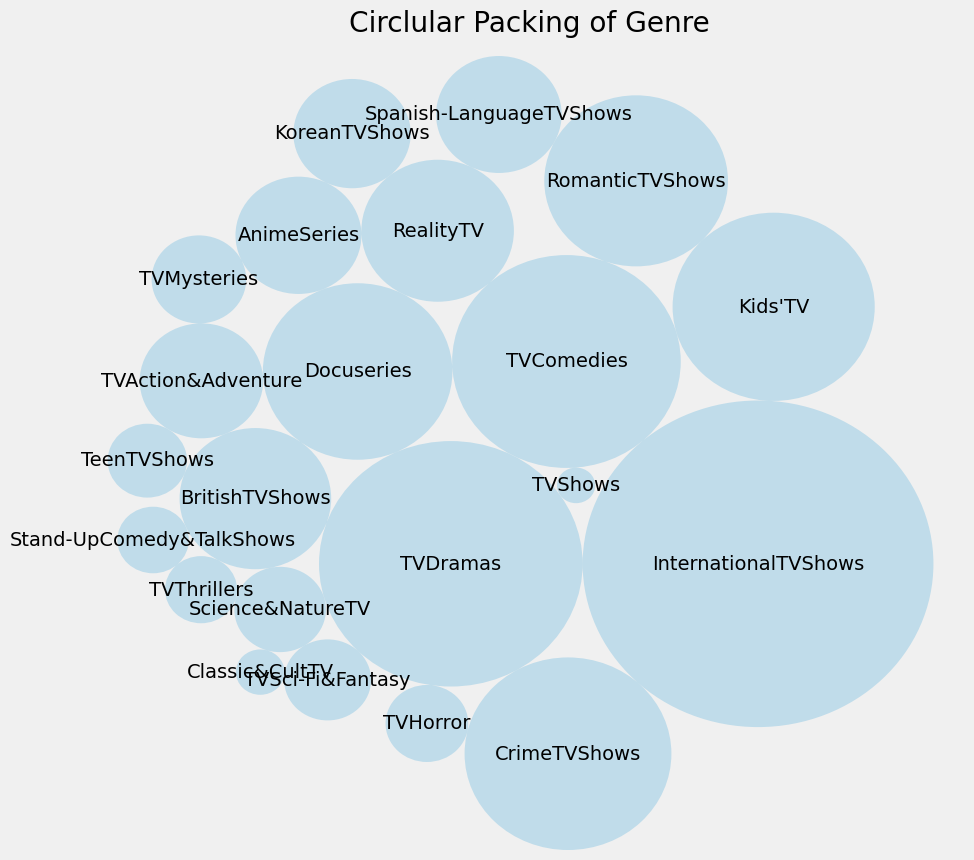

In [ ]:
#  Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Circlular Packing of Genre')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = g.keys()

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
        label,
        (x,y ) ,
        va='center',
        ha='center'
    )

4. Rating

In [ ]:
rating_counts = netflix_shows_df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

In [ ]:
# Tạo biểu đồ cột dọc sử dụng Plotly Express
fig = px.bar(rating_counts, x='Count', y='Rating', orientation='h', title='Phân phối Rating của TV Show')

# Hiển thị biểu đồ
fig.show()

5. Duration(Season)

In [ ]:
netflix_shows_df['num_seasons'] = netflix_shows_df['duration'].str.extract('(\d+)').astype(int)

<ipython-input-45-21aa2444a112>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Tạo bảng pivot cho phân tích
pivot_table = netflix_shows_df.pivot_table(index='num_seasons', values='show_id', aggfunc='count')

# Chuyển định dạng dữ liệu để biểu đồ
pivot_table.reset_index(inplace=True)
pivot_table.rename(columns={'show_id': 'count'}, inplace=True)

# Sắp xếp theo số lượng mùa
pivot_table.sort_values(by='num_seasons', inplace=True)

# Tạo biểu đồ đường
fig = px.line(pivot_table, x='num_seasons', y='count', title='Số lượng season của TV Show')

# Hiển thị biểu đồ
fig.show()


In [ ]:
netflix_shows_df['num_seasons'].describe()

count    2664.000000
mean        1.751877
std         1.550622
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: num_seasons, dtype: float64

In [ ]:
# Tính số lượng mùa trung bình cho mỗi năm
average_seasons_by_year = netflix_shows_df.groupby("release_year")["num_seasons"].mean()
seasons_under_10 = netflix_shows_df[netflix_shows_df["num_seasons"] < 10 ]
average_seasons_by_year_under_10 = seasons_under_10.groupby("release_year")["num_seasons"].mean()


# Tạo một biểu đồ Plotly
fig = go.Figure()

# Thêm dòng biểu đồ về số lượng mùa trung bình
fig.add_trace(go.Scatter(x=average_seasons_by_year.index, y=average_seasons_by_year.values,
                         mode='lines', line=dict(color='grey'), name='Số lượng mùa trung bình'))
fig.add_trace(go.Scatter(x=average_seasons_by_year_under_10.index, y=average_seasons_by_year_under_10.values,
                         mode='lines', line=dict(color='dodgerblue'), name='Số lượng mùa dưới 10 của TV Show'))

# Tùy chỉnh layout
fig.update_layout(
    title="Số lượng mùa trung bình theo Năm phát hành",
    xaxis_title="Năm phát hành",
    yaxis_title="Số lượng mùa",
    legend=dict(x=0, y=1),
    template="plotly_white"
)

# Hiển thị biểu đồ
fig.show()


# CONTENT-BASED RECOMMENDATIONS SYSTEM


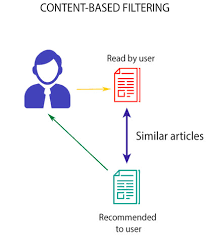

TF-IDF (Term Frequency-Inverse Document Frequency) là một phương pháp được sử dụng trong xử lý ngôn ngữ tự nhiên và truy vấn thông tin để đánh giá tầm quan trọng của một từ trong một tài liệu hoặc tập tài liệu. Nó giúp đo lường tần suất xuất hiện của một từ trong tài liệu (TF) và cân nhắc trọng số ngược của từ đó dựa trên số lượng tài liệu mà từ đó xuất hiện (IDF).

Cụ thể:
- Tần suất thuật ngữ (TF) đo lường tần suất xuất hiện của một từ trong một tài liệu cụ thể. Tần suất này thường được tính bằng cách chia số lần xuất hiện của từ trong tài liệu cho tổng số từ trong tài liệu đó. TF cho biết mức độ quan trọng của từ trong tài liệu cụ thể.

- Tần suất ngược tài liệu (IDF) đo lường tầm quan trọng của từ trong tất cả các tài liệu. Tần suất này thường được tính bằng cách lấy logarit tổng số tài liệu chia cho số tài liệu mà từ đó xuất hiện. IDF giúp làm giảm tầm quan trọng của các từ phổ biến xuất hiện trong nhiều tài liệu.

Kết hợp TF và IDF, phương pháp TF-IDF tạo ra một điểm số cho mỗi từ trong tài liệu, dựa trên sự kết hợp giữa tần suất xuất hiện trong tài liệu cụ thể và tầm quan trọng toàn cục của từ đó. Phương pháp này thường được sử dụng trong việc xác định sự tương đồng giữa các tài liệu hoặc trong việc trích xuất thông tin quan trọng từ văn bản.

Chúng ta sẽ sử dụng phương pháp này kết hợp với Cosine Similarity Score để tìm ra sự tương đồng của các bộ phim dựa trên các hệ đo lường(metrics) mà dataset cung cấp.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8790, 18878)

Có khoảng 18878 từ diễn tả cho 8790 bộ phim trong dataset. Ta sẽ sử dụng Điểm tương đồng Cosine để tính mức độ tương tự của các bộ phim, từ đó đưa ra gợi ý những bộ phim tương tự.

Cosine similarity score là một phương pháp được sử dụng để đo lường mức độ tương đồng giữa hai vector trong không gian đa chiều. Được sử dụng rộng rãi trong xử lý ngôn ngữ tự nhiên và truy vấn thông tin, cosine similarity đo lường góc giữa hai vector trong không gian đa chiều và cho biết mức độ hướng tương tự của chúng.

Cách tính cosine similarity:
1. Tính tích vô hướng (dot product) của hai vector.
2. Tính độ dài của từng vector.
3. Chia kết quả dot product cho tích của độ dài của hai vector.

Kết quả của cosine similarity score nằm trong khoảng từ -1 đến 1, trong đó:
- Khi cosine similarity gần bằng 1, hai vector có hướng rất tương tự nhau.
- Khi cosine similarity gần bằng 0, hai vector có hướng không tương tự hoặc không tương quan.
- Khi cosine similarity gần bằng -1, hai vector có hướng trái ngược nhau.

Cosine similarity thường được sử dụng để đo tương đồng giữa các văn bản, tài liệu, hoặc các đối tượng có thể biểu diễn dưới dạng vector. Trong việc so sánh văn bản, cosine similarity score giúp xác định mức độ tương tự giữa các văn bản dựa trên sự liên quan hướng của từng văn bản.
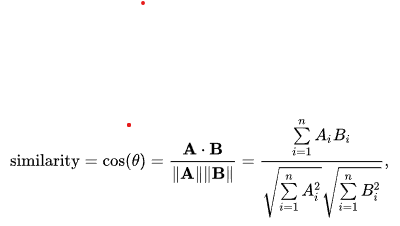

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

Và đây sẽ là gợi ý đưa ra chỉ dựa trên plot( nội dung được miêu tả trong phần description của phim):

In [ ]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [ ]:
get_recommendations('Breaking Bad')

5446                      Lucid Dream
3399                    In My Country
8120                          Sunrise
7543                   My Only Mother
93                               JJ+E
6893                           Grease
6173           Antariksha Ke Rakhwale
3500     Between Two Ferns: The Movie
1719    We Are All For The Fatherland
558                         6 Bullets
Name: title, dtype: object

Có thể thấy mô hình hoạt động khá tốt. Ta sẽ thử đưa thêm các hệ đo lường để xem liệu mô hình có được cải thiện hơn không.

## CONTENT BASED FILTERING ON MULTIPLE METRICS

Bộ lọc sẽ phụ thuộc vào các yếu tố sau:

* Title
* Cast
* Director
* Listed in
* Plot

Như đã đề cập từ đầu, có rất nhiều các bộ phim với tên tác giả vô danh, vì thế ta sẽ phải thay thế 1 lần nữa các giá trị null thành các string rỗng để đề phòng các lỗi không đáng có.

In [ ]:
filledna = df.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9


Biến tất cả các từ thành lower case:

In [ ]:
def clean_data(x):
    return str.lower(x.replace(" ", ""))

nhận diện các features mà chúng ta muốn mô hình sử dụng để lọc và đưa ra gợi ý:

In [ ]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [ ]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)

filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,nocast,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,nodirector,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


Creating a "soup" or a "bag of words" for all rows.

In [ ]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

We are now considering using CountVectorizer or TFIDF is the more efficient way to use in the model. After considering the outputs of models using Count and TFIDF, we chose to go with the TFIDF Vectorizer because of how TFIDF weigh the importance of a component.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

tfidf2 = TfidfVectorizer(stop_words='english')
tfidf2_matrix = tfidf2.fit_transform(filledna['soup'])

cosine_sim_count = cosine_similarity(count_matrix, count_matrix)
cosine_sim_tfidf = cosine_similarity(tfidf2_matrix, tfidf2_matrix)

In [ ]:
print(cosine_sim_count)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.04503773 ... 0.         0.         0.        ]
 [0.         0.04503773 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.06933752 0.        ]
 [0.         0.         0.         ... 0.06933752 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
print(cosine_sim_tfidf)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.0051946  ... 0.         0.         0.        ]
 [0.         0.0051946  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.00759028 0.        ]
 [0.         0.         0.         ... 0.00759028 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

Ta sẽ tạo function giống như trên, tuy nhiên thay vào đó là sử dụng độ tương đồng cosine mới dựa trên những metrics mới được thêm vào.

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
get_recommendations_new('Breaking Bad', cosine_sim_count)

2931                       Better Call Saul
678     The Assassination of Gianni Versace
1980                          The Blacklist
2767                                  Ozark
4079                               Unsolved
1477                                Dare Me
3684                              Kakegurui
3762                    Designated Survivor
8397           The Lizzie Borden Chronicles
3604                               Sintonia
Name: title, dtype: object

In [ ]:
get_recommendations_new('breakingbad', cosine_sim_tfidf)

2931                                     Better Call Saul
3428                      El Camino: A Breaking Bad Movie
8505                                             The Show
5606                                     Girlfriend's Day
4361                                           Time Share
3364    The Road to El Camino: Behind the Scenes of El...
8099                                          Straight Up
678                   The Assassination of Gianni Versace
7853                                             Remember
3684                                            Kakegurui
Name: title, dtype: object

Và viết 1 function tương tự nhưng chỉ trả về indices và điểm số cosine của các bộ phim đó dưới dạng list:

In [ ]:
def get_top_10(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    return sim_scores

In [ ]:
get_top_10('breakingbad', cosine_sim_tfidf)

[(2931, 0.28554841396578107),
 (3428, 0.15455398551479987),
 (8488, 0.12555892062614293),
 (5605, 0.0958945914348307),
 (4361, 0.08775418747631293),
 (3364, 0.08298320526325834),
 (8083, 0.07417321860776613),
 (678, 0.07345441261573085),
 (7837, 0.07245162073663303),
 (3684, 0.06890673007227932)]

In [ ]:
get_top_10('breakingbad', cosine_sim_count)

[(2931, 0.411764705882353),
 (678, 0.25928148942086576),
 (1980, 0.24253562503633297),
 (2767, 0.24253562503633297),
 (4079, 0.24253562503633294),
 (1477, 0.23529411764705882),
 (3684, 0.23008949665421113),
 (3762, 0.22256595362986287),
 (8380, 0.22256595362986287),
 (3604, 0.2193817272381392)]

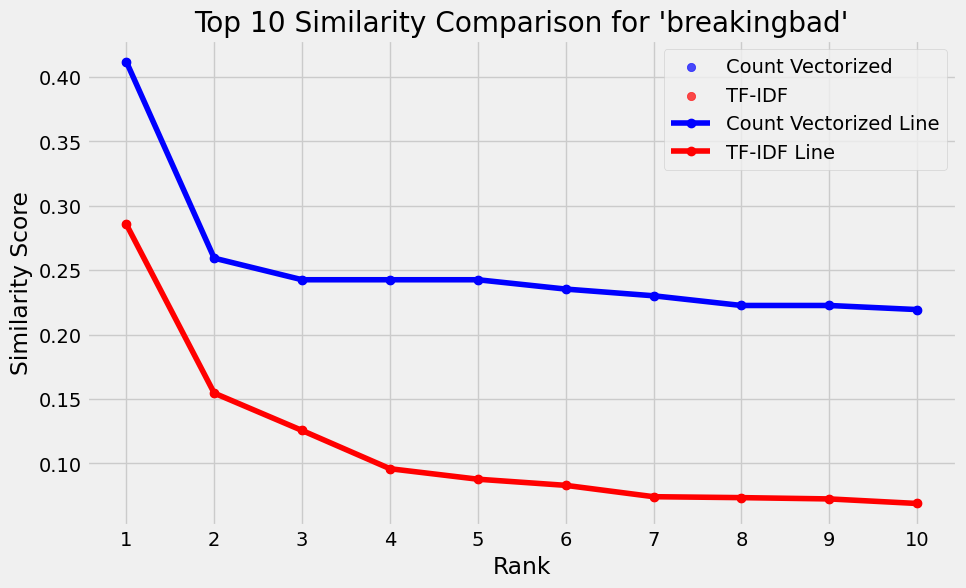

In [ ]:
title = 'breakingbad'

# Get top 10 similarity scores for count vectorized method
top_count_scores = [score for idx, score in get_top_10(title, cosine_sim=cosine_sim_count)]

# Get top 10 similarity scores for TF-IDF method
top_tfidf_scores = [score for idx, score in get_top_10(title, cosine_sim=cosine_sim_tfidf)]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 11), top_count_scores, color='blue', label='Count Vectorized', alpha=0.7)
plt.scatter(range(1, 11), top_tfidf_scores, color='red', label='TF-IDF', alpha=0.7)

# Adding lines connecting the dots
plt.plot(range(1, 11), top_count_scores, marker='o', color='blue', linestyle='-', label='Count Vectorized Line')
plt.plot(range(1, 11), top_tfidf_scores, marker='o', color='red', linestyle='-', label='TF-IDF Line')

plt.xlabel('Rank')
plt.ylabel('Similarity Score')
plt.title(f"Top 10 Similarity Comparison for '{title}'")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()


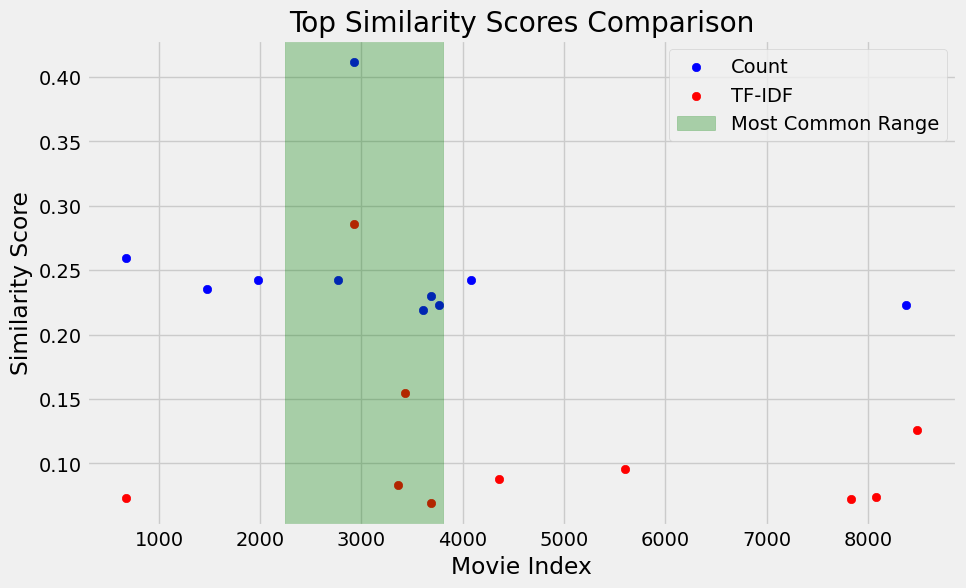

In [ ]:
import numpy as np

# Sample data for the two methods
count_scores = get_top_10(title, cosine_sim_count)

tfidf_scores = get_top_10(title, cosine_sim_tfidf)

# Extract movie indices and similarity scores
indices1, scores1 = zip(*count_scores)
indices2, scores2 = zip(*tfidf_scores)

# Combine indices from both methods
all_indices = list(indices1) + list(indices2)

# Calculate histogram to identify the most common indices
hist, bins = np.histogram(all_indices, bins=5)  # Adjust the number of bins as needed
most_common_bin = bins[np.argmax(hist)]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(indices1, scores1, color='blue', label='Count')
plt.scatter(indices2, scores2, color='red', label='TF-IDF')
plt.axvspan(most_common_bin, most_common_bin + (bins[1] - bins[0]), color='green', alpha=0.3, label='Most Common Range')
plt.xlabel('Movie Index')
plt.ylabel('Similarity Score')
plt.title('Top Similarity Scores Comparison')
plt.legend()
plt.grid(True)
plt.show()


Đây là biểu đồ phân tán thể hiện top 10 bộ phim có điểm số tương tự ( Cosine Similarity Score) cao nhất của hai mô hình sử dụng Count và TF-IDF. Hình chữ nhật màu xanh lam đánh dấu phạm vi các chỉ số mà tập trung nhiều điểm nhất. Phạm vi này đại diện cho các chỉ số có mật độ điểm tương đồng cao nhất cho cả hai phương pháp. Điều này giúp xác định một phạm vi cụ thể đáng quan tâm có thể có điểm tương đồng cao hơn cho cả hai phương pháp. Tuy nhiên, chỉ có 2 trên tổng số 10 indices với điểm số cao nhất của 2 mô hình là trùng nhau, vì thế ta chưa đưa ra được quá nhiều đánh giá cho phép so sánh này.

Dựa vào cái nhìn chủ quan của người xây dựng mô hình, ta thấy rằng mô hình sử dụng TF-IDF phần nào thể hiện hiệu năng tốt hơn khi có 3/10 bộ phim được gợi ý có sự liên hệ trực tiếp(đây đều là những bộ phim riêng lẻ trong cùng một dòng thời gian và sự kiện đối với tiêu đề đưa vào trước đó) đối với tiêu đề được đưa vào(ảnh dưới), chưa kể một bộ phim có điểm số tương đồng cao ở cả 2 mô hình TF-IDF và Count.

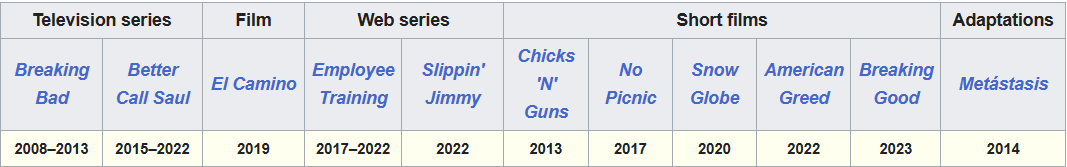

**Ta có thể kết luận sơ bộ rằng mô hình sử dụng TF-IDF kết hợp với Cosine Similarity là mô hình tối ưu để sử dụng cho hệ thống gợi ý dữ liệu này. **
